# 4.1.1 정규방정식

In [1]:
from IPython.display import Image

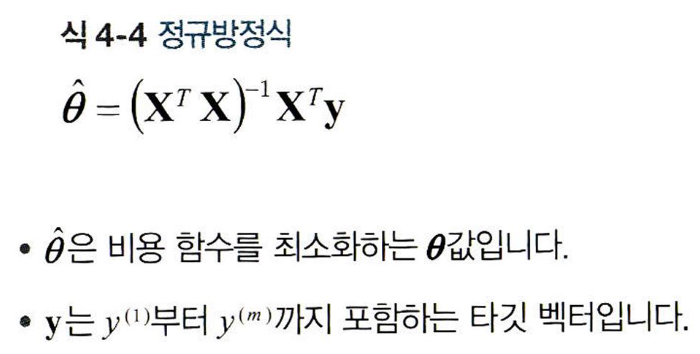

In [5]:
Image("/Users/ijiseon/Desktop/정규방정식.png")

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X+ np.random.randn(100,1)

In [7]:
X_b = np.c_[np.ones((100,1)),X] # 모든 샘플에 x0=1을 추가합니다
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.06296805],
       [2.91559037]])

> 4와 3을 기대. 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함.

In [9]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0=1을 추가합니다

y_predict = X_new_b.dot(theta_best)

In [10]:
y_predict

array([[4.06296805],
       [9.89414879]])

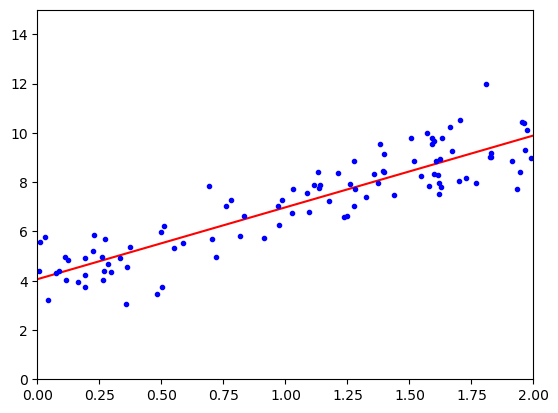

In [12]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

> 사이킷런에서 선형 회귀 수행

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [14]:
lin_reg.intercept_, lin_reg.coef_

(array([4.06296805]), array([[2.91559037]]))

In [15]:
lin_reg.predict(X_new)

array([[4.06296805],
       [9.89414879]])

- LinearRegression 클래스는 scipy.linalg.lstsq() 함수('최소 제곱'에서 이름을 따옴)를 기반으로 함. 이 함수를 직접 호출할 수 있음

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)

In [17]:
theta_best_svd

array([[4.06296805],
       [2.91559037]])

In [18]:
np.linalg.pinv(X_b).dot(y)

array([[4.06296805],
       [2.91559037]])

- 이 함수는 유사역행렬을 기반으로 계산 

- 유사 역행렬 자체는 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산 

- 정규 방정식을 계산하는 것보다 이 방식이 훨씬 효율적. 또한 극단적인 경우도 처리할 수 있음 <br>
실제로 m<n 이거나 어떤 특성이 중복되어 역행렬이 없다면 정규방정식이 작동하지 않을 수 있음. 하지만 유사역행렬은 항상 구할 수 있음

# 4.2 경사하강법

- 경사하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조절 

ex) 짙은 안개 때문에 산속에서 길을 잃었다고 생각해보자. 발밑 지면의 기울기만 느낄 수 있음. 빨리 골짜기로 내려가는 좋은 방법은 가장 가파른 길을 따라 아래로 내려가는 것. 이것이 바로 경사 하강법의 원리

- 파라미터 벡터에 대해 비용 함수의 현재 gradient를 계산. 그리고 gradient가 감소하는 방향으로 진행. gradient가 0이 되면 최솟값에 도달한 것! 

- 구체적으로 보면 임의의 값으로 시작해서 (무작위 초기화_ random initialization) 한번에 조금씩 비용 함수(예를 들면 MSE)가 감소하는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킴

- 사실 비용함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있음 

특성1과 특성2의 스케일이 같은 훈련 세트(왼쪽)와 특성1이 특성2보다 더 작은 훈련 세트(오른쪽)에 대한 경사 항강법을 보여줌

왼쪽의 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달. 반면에 오른쪽 그래프는 처음엔 전역 최솟값의 방향에 거의 직각으로 향하다가 평편한 골짜기를 길게 돌아서 나갑니다. 결국 최솟값에 도달하겠지만 시간이 오래걸릴 것입니다. 

- 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 합니다. (예를 들면 사이킷런의 StandardScaler를 사용하여). 그렇지 않으면 수렴하는 데 훨씬 오래 걸립니다

# 4.2.1 배치 경사 하강법

- 경사 하강법을 구현하려면 각 모델 파라미터에 대해 비용 함수의 그레이디언트를 계산해야 함

- 다시말해 각 파라미터가 조금 변경될 때 비용함수가 얼마나 바뀌는지 계산해야 함

**편도함수**

: 이는 '동쪽을 바라봤을 때 발밑에 느껴지는 산의 기울기는 얼마인가?'와 같은 질문입니다. 그리고 같은 질문을 북쪽에 대해서도 합니다. (3차원 이상의 세상이라 가정하면 다른 모든 차원에 대해서도 반복합니다)

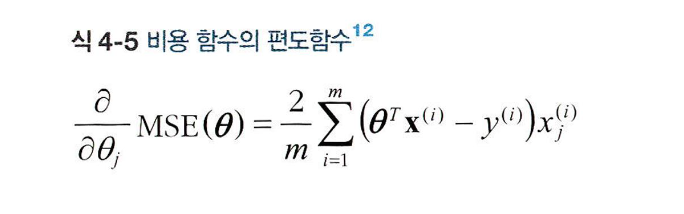

In [19]:
Image("/Users/ijiseon/Desktop/4-5.png")

: 편도함수를 각각 계산하는 대신 한꺼번에 계산

: 아래의 식은 비용함수의 (모델 파라미터마다 한 개씩인) 편도함수를 모두 담고 있음

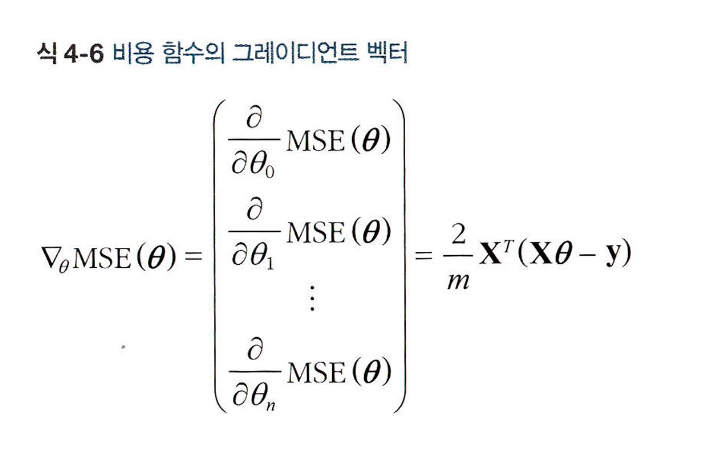

In [21]:
Image("/Users/ijiseon/Desktop/4-6.png")

- 이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산합니다! 그래서 이 알고리즘을 배치 경사 하강법이라고 합니다. 즉, 매 스텝에서 훈련 데이터 전체를 사용합니다 (사실 전체 경사 하강법이 더 적절한 이름 같습니다) 이런 이유로 매우 큰 훈련 세트에서는 아주 느립니다. 그러나 경사하강법은 특성 수에 민감하지 않습니다. 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠릅니다

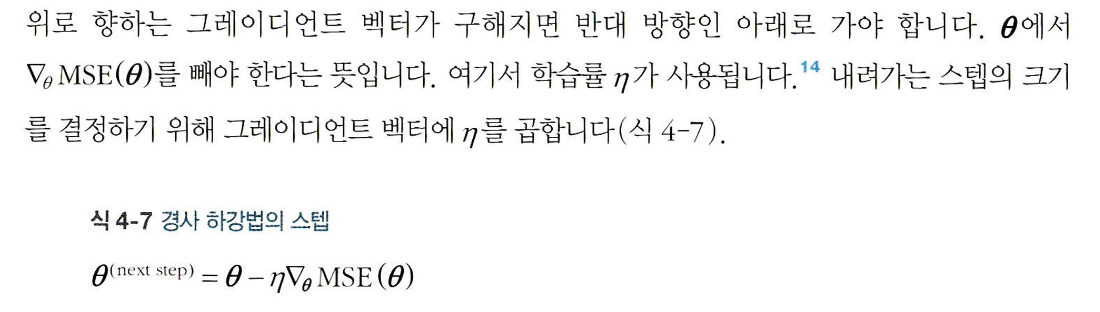

In [22]:
Image("/Users/ijiseon/Desktop/경사하강법의 스텝.png")

In [23]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100 # 훈련 세트에 있는 샘플 수 

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [24]:
theta

array([[4.06296805],
       [2.91559037]])

# 4.2.2 확률적 경사 하강법

- 배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레디언트를 계산한다는 사실 -> 훈련세트가 커지면 매우 느려짐

- 이와는 정반대로 **확률적 경사 하강법**은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산. 

: 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠름 

반면에 확률적 (즉, 무작위)이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정 <br>
비용 함수가 최솟값에 다다를 때가지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소<br>

시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지는 못할 것 <br>
알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아님

비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높음 

무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않음

이 딜레마를 해결하는 한 가지 방법은 학습률을 점진적으로 감소시키는 것 <br>
시작할 때는 학습률을 크게 하고 (수렴을 빠르게 하고 지역 최솟값에 빠지지 않게), <br>
점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함 

매 반복에서 학습률을 결정하는 함수를 "학습 스케줄"

In [25]:
n_epochs = 50 
t0, t1 = 5, 50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) #무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients

In [26]:
theta

array([[4.0481247 ],
       [2.90001943]])

> 일반적으로 한 반복에서 m번(훈련 세트에 있는 샘플 수) 되풀이 되고, 이때 각 반복을 "에포크"라고 합니다. 배치 경사 하강법 코드가 전체 훈련 세트에 대해 1000번 반복하는 동안 이 코드는 훈련 세트에서 50번반 반복하고도 매우 좋은 값에 도달

- 사이킷런에서 SGD 방식 

: 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 ㅗㅁㅅ할 수 있음. 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있음 

In [27]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [28]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.06470068]), array([2.9040616]))

# 4.2.3 미니배치 경사 하강법

- 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아님

- "미니배치"라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산. 

- 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD 보다 덜 불규칙하게 움직임. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것입니다. 하지만 지역 최솟값에 빠져나오기는 더 힘들지도 모름

# 4.3 다항 회귀

가지고 있는 데이터가 단순한 직선보다 복잡한 형태라면? <br>
신기하게도 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있음

이렇게 하는 간단한 방법은 각 특성의 거듭제곱을 새로운 특성으로 추가하고, <br>
이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것 

-> **다항회귀**

In [5]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X+2 + np.random.randn(m,1)

확실히 직선은 이 데이터에 잘 맞지 않을 것입니다. <br>
사이킷런의 PolynomialFeatures -> 훈련 세트에 있는 각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가 

In [30]:
from sklearn.preprocessing import PolynomialFeatures 

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [31]:
X[0]

array([1.0683735])

In [32]:
X_poly[0]

array([1.0683735 , 1.14142194])

X_poly는 이제 원래 특성 X와 이 특성의 제곱을 포함함 

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [35]:
lin_reg.intercept_, lin_reg.coef_

(array([2.04185883]), array([[0.97202955, 0.49721787]]))

# 4.4 학습 곡선

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
    train_errors, val_errors= [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="train set")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3, label="val set")
    plt.legend()
    plt.show()

In [54]:
lin_reg = LinearRegression()

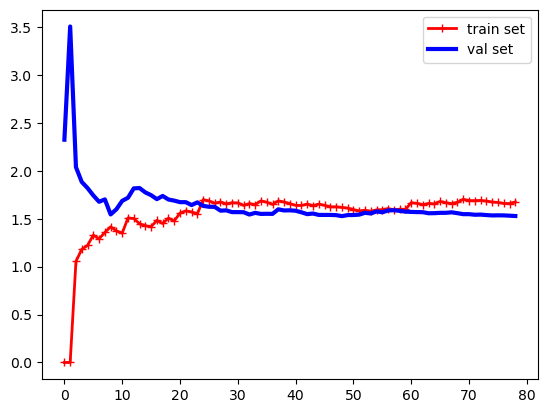

In [55]:
plot_learning_curves(lin_reg,X,y)

> 과소적합

- 훈련 데이터에 대한 모델의 성능<br>
그래프가 0에서 시작하므로 훈련 세트에 하나혹은 두 개의 샘플이 있을 때는 모델이 완벽하게 작동 <br>
하지만 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능해짐. 그래서 곡선이 어느정도 평편해질 때까지 오차가 계속 상승 <br>
이 위치에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않음

- 검증 데이터에 대한 모델의 성능 <br>
모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 큼 <br>
모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소 <br>

> 이 학습 곡선이 과소적합 모델의 전형적인 모습. <br>
두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있음

> 모델이 훈련 데이터에 과소적합되어 있다면 훈련 샘플을 더 추가해도 효과가 없음. 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 함

In [58]:
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
    train_errors, val_errors= [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="train set")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3, label="val set")
    plt.axis([0,80,0,3])
    plt.legend()
    plt.show()

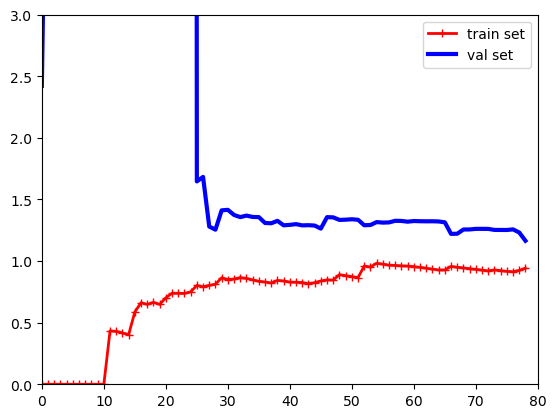

In [59]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

이 학습 곡선은 이전과 비슷해 보이지만 두가지 매우 중요한 차이점 0

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮습니다

- 두 곡선 사이에 공간이 있습니다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 는 과대적합 모델의 특징입니다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워집니다

> 편항/분산 트레이드 오프

통계학과 머신러닝에서 나온 중요한 이론 하나는 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현될 수 있다는 사실 

- 편향<br>
: 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우.<br>
편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽다 
- 분산<br>
: 분산은 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남
자유도가 높은 모델(예를 들어 고차 다항 회귀 모델)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있음
- 줄일 수 없는 오차 <br>
: 줄일 수 없는 오차는 데이터 자체에 있는 잡음 때문에 발생. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것 

> 모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어듭니다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아집니다. 

# 4.5 규제가 있는 선형 모델

- 선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가함

- 각기 다른 방법으로 가중치를 제한하는 '릿지'회귀, '라쏘' 회귀, 엘라스티넷

- 릿지회귀 

: 규제항이 비용함수에 추가됨 -> 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력 <br>
: 규제항은 훈련하는 동안에만 비용함수에 추가 <br>
: 하이퍼파라미터는 모델을 얼마나 많이 규제할지 조절 (알파가 0이면 릿지 회귀는 선형회귀와 같아짐. 알파가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨)

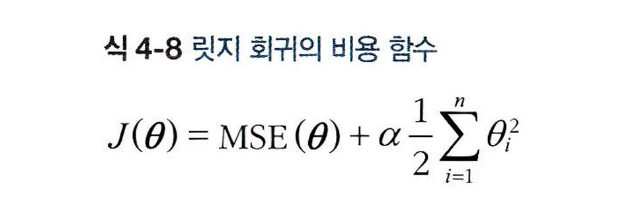

In [2]:
Image("/Users/ijiseon/Desktop/릿지.png")

In [60]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [61]:
ridge_reg.predict([[1.5]])

array([[5.08775219]])

In [63]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())

SGDRegressor()

In [64]:
sgd_reg.predict([[1.5]])

array([5.07375429])

- 라쏘 회귀 <br>

: 선형 회귀의 또 다른 규제된 버전 

: 라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 점 (즉, 가중치가 0이 됨)<br>
= 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만든다. <br>


In [65]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)

Lasso(alpha=0.1)

In [66]:
lasso_reg.predict([[1.5]])

array([5.04264737])

- 엘라스티넷 <br>

: 릿지 회귀와 라쏘 회귀를 절충한 모델 <br>
: 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절<br>
: r=0이면 엘라스티넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같음 <br>

In [68]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)

ElasticNet(alpha=0.1)

In [69]:
elastic_net.predict([[1.5]])

array([5.04468896])

> 릿지가 기본이 되지만 쓰이는 특성이 몇 개 뿐이라고 의심되면 라쏘나 엘라스티넷이 낫습니다. 이 모델들은 이전에 이야기한 것처럼 불필요한 특성의 가중치를 0으로 만들어 줍니다. 특성 수 가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스티넷을 선호

- 조기 종료

In [14]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

import numpy as np


# 데이터 준비
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])


X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array w

# 4.6 로지스틱 회귀

In [71]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [72]:
X = iris["data"][:,3:] #꽃잎의 너비
y = (iris["target"]==2).astype(np.int) # Iris-Virginica면 1, 그렇지않으면 0

/var/folders/f4/skyf3wfx5570p30yjkrfkxd00000gn/T/ipykernel_45361/3207553101.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"]==2).astype(np.int) # Iris-Virginica면 1, 그렇지않으면 0


In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

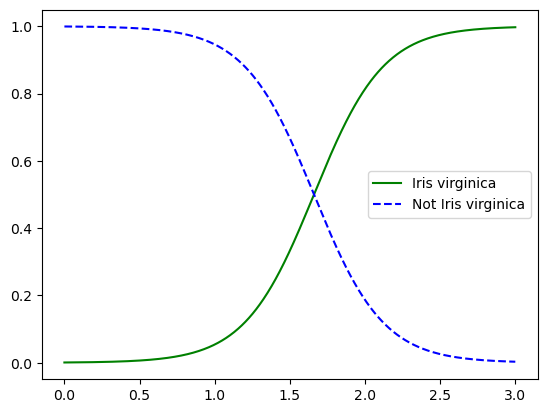

In [77]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산해보겠습니다

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:,1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:,0],"b--",label="Not Iris virginica")
plt.legend()
plt.show()

In [84]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

# 4.6.4 소프트맥스 회귀

In [86]:
X = iris["data"][:,(2,3)] #꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [87]:
softmax_reg.predict([[5,2]])

array([2])

In [88]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])